# PCA Outlier detection and validation

## Recap: Interpreting a PCA model

**Number of components to take into account:** The number of components in the model characterizes the structure of the data: the fewer PCs needed, the simpler the model (and easier interpretation?)

**Scores:** The score plot shows how the data are distributed. Sample patterns, groupings, similarities, and differences can be studied 

**Loadings:** The loading plot is useful to understand the correlations between the variables 

**Residuals and plots for detecting outliers:** Various plots of residuals and other diagnostic tools give information about possible outliers and anomalies 

We use the letter A to indicate the number of components in a PCA model

## Dataset
**Objective:** Classification of spearheads form the Sahara desert

**Data:**
- 75 samples: 63 for training, 12 in the test set
- Ten chemical elements

**Procedure**
- Plotting raw data
- PCA
- Interpretation of scores and loadings
- Finding the optimal number of PCs 

### Import data

In [1]:
import numpy as np
import pandas as pd

filename='./data/Arch.txt'
df=pd.read_csv(filename,sep=',')

Printing the first 30 samples of the dataset

In [2]:
df.head(30)

,Unnamed: 0,A,B,C,D,Class,Fe,Ti,Ba,Ca,K,Mn,Rb,Sr,Y,Zr
0,A#1,1,0,0,0,A,1100,390,55,920,460,45,120,57,58,142
1,A#2,1,0,0,0,A,1173,417,54,961,441,47,135,55,60,145
2,A#3,1,0,0,0,A,1164,404,56,916,446,42,120,58,45,148
3,A#4,1,0,0,0,A,1030,373,59,920,487,38,128,53,58,138
4,A#5,1,0,0,0,A,1077,373,55,888,455,38,97,51,54,145
5,A#6,1,0,0,0,A,1080,403,53,919,442,41,133,60,45,155
6,A#7,1,0,0,0,A,1020,360,59,883,473,43,119,40,50,134
7,A#8,1,0,0,0,A,1050,396,56,924,482,48,140,74,71,157
8,A#9,1,0,0,0,A,1100,373,53,910,477,51,137,61,58,152
9,A#10,1,0,0,0,A,1069,375,51,958,429,42,100,51,47,128


In [3]:
df = df[df.columns.drop('Unnamed: 0')]

### Split the dataset in training and test set

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.16)
y_col = 'Class'
y_train = train[y_col]
X_train = train[train.columns.drop(y_col)]
y_test = test[y_col]
X_test = test[test.columns.drop(y_col)]

### Normalize data

Make the dataset have unit variance and zero-mean

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Plots

### Explained Variance

In [7]:
import plotly.express as px

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}, 
    title="Explained Variance"
)


### Defining what components to plot

In [8]:
# NB: Zero-indexed
comp1 = 0
comp2 = 1

### Score Plot

In [9]:
fig = px.scatter(X_train_pca, x=comp1, y=comp2, color=y_train,
                title=f"Score Plot for component {comp1} and {comp2}")
fig.show()

### Loadings

Variables close to each other in the loadings plot will have a high positive correlation if the two components explain a large portion of the variance of **X** for these variables. Variables in diagonally opposed quadrants will have a tendency to be negatively correlated. 

In [10]:
loadings = pca.components_.T 
features = train.columns.drop(y_col) 

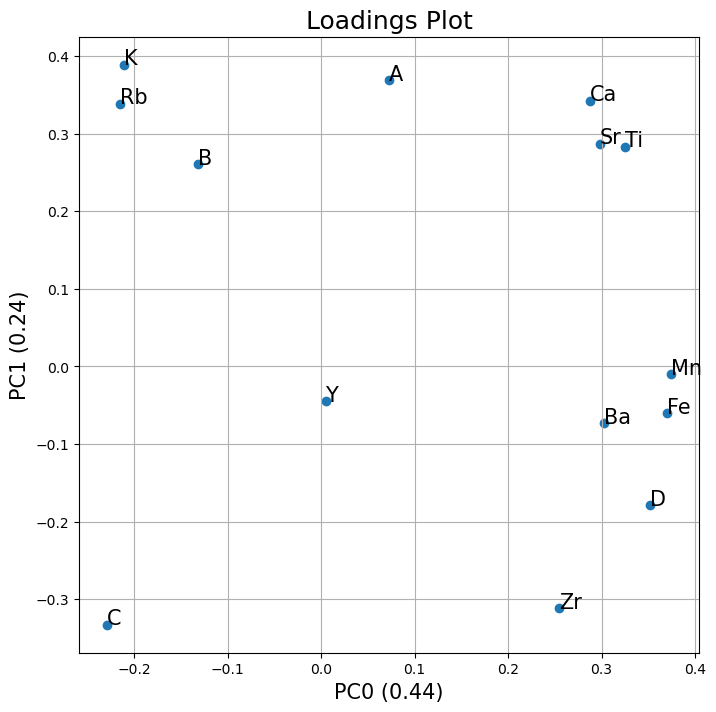

In [11]:
import matplotlib.pyplot as plt

x = []
y = []
for i, feature in enumerate(features):
    x += [loadings[i, comp1]]
    y += [loadings[i, comp2]]
figure, axes = plt.subplots(figsize=(8,8))
plt.scatter(x,y)

for i, feature in enumerate(features):
    plt.annotate(feature, (x[i], y[i]), fontsize=15)

xlabel = f"PC{comp1} (%.2f)"%pca.explained_variance_ratio_[comp1]
ylabel = f"PC{comp2} (%.2f)"%pca.explained_variance_ratio_[comp2]



plt.title('Loadings Plot', fontsize = 18)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel(ylabel, fontsize=15)

plt.grid()
plt.show()

### Correlation matrix for comparison

Text(0.5, 1.0, 'Correlation Matrix')

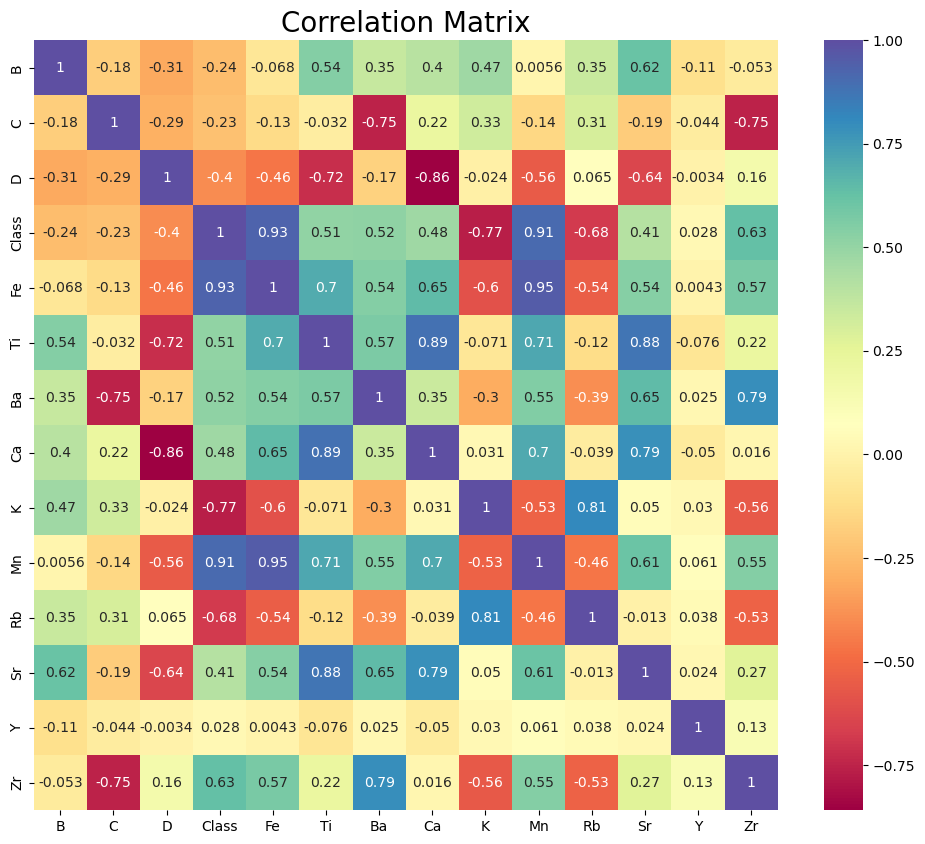

In [12]:
import seaborn as sns
plt.figure(figsize=(12,10))
ticks = np.arange(0.5, len(X_train[0]))
ax = sns.heatmap(np.corrcoef(X_train, rowvar=False), annot=True, cmap='Spectral')
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df.columns)[1:])
ax.set_yticklabels(list(df.columns)[1:])
ax.set_title('Correlation Matrix', fontsize=20)

For component 0 and 1, we can see that e.g. Ca and Sr are close together in the Loadings plot. Comparing it to the correlation matrix, we can see that the two variables have a high positive correlation while e.g. Zr and Rb are located on the diagonal of each other and have a negative correlation

### Influence

In [13]:
t_squared = pca.score(X_train, y_train)
f_res = pca.score_samples(X_train)

# plt.plot(t_squared,f_res)


### Correlation loadings
As the loadings are orthonormal, the values will depend on the number of variables. Thus, it is not possible to give a rule of thumb on what is a critical value for a loading to be important. 

Alternative: **correlation loadings**, the square root of the explained variance.
The outer circle represents a variable being 100% explained, and the inner 50% explained. 

In [14]:
corr_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

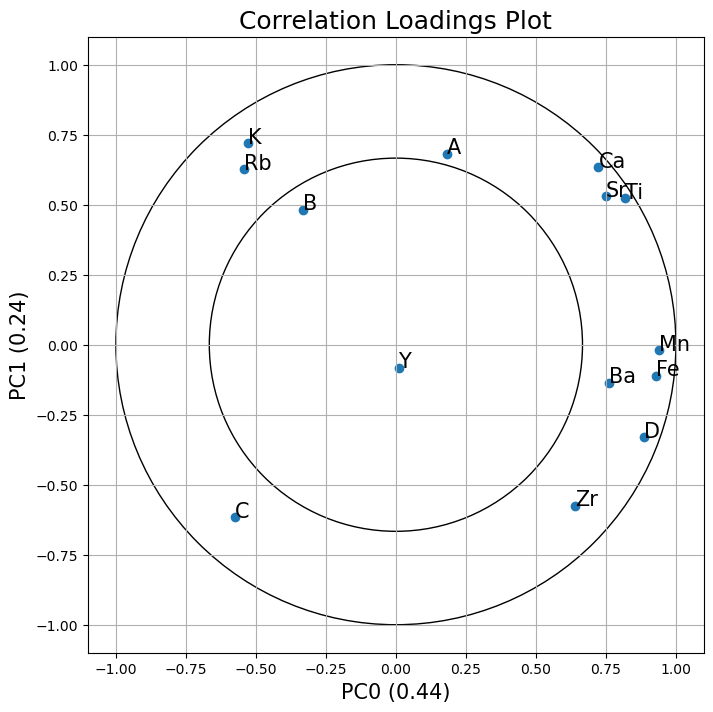

In [15]:
figure, axes = plt.subplots(figsize=(8,8))
x = []
y = []
for i, feature in enumerate(features):
    x += [corr_loadings[i, comp1]]
    y += [corr_loadings[i, comp2]]
plt.scatter(x,y)

v = np.sqrt(pca.explained_variance_ratio_[0])

outer_circ = plt.Circle( (0, 0), 1 , fill = False )
inner_circ = plt.Circle( (0, 0), v, fill = False)
axes.set_aspect( 1 )
axes.add_artist(outer_circ)
axes.add_artist(inner_circ)

for i, feature in enumerate(features):
    plt.annotate(feature, (x[i], y[i]), fontsize=15)
xlabel = f"PC{comp1} (%.2f)"%pca.explained_variance_ratio_[comp1]
ylabel = f"PC{comp2} (%.2f)"%pca.explained_variance_ratio_[comp2]

plt.title('Correlation Loadings Plot', fontsize = 18)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel(ylabel, fontsize=15)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()



## Interpreting scores and loadings

When you have a dataset, you can make certain judgements about groupings , similar traits, opposite traits, and what variables are correlated. With PCA you don’t need to make these assumptions because you get this information in an unsupervised way. 

In [16]:
fig = px.scatter(X_train_pca, x=0, y=1, color=y_train, title='Correlation loadings and Scores')

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=corr_loadings[i, comp1],
        y=corr_loadings[i, comp2],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=corr_loadings[i, comp1],
        y=corr_loadings[i, comp2],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )

fig.show()

## Deciding number of components

## Rotation in PCA

It is not given that the directions of the PCs yields the best itrepretation of the underlying structure in the data. It may in some cased be beneficial to rotate the PCA solution. These rotations may be orthogonal or oblique. It is importantat that the optimal number of PCs is assessed based on proper validation before the rotation is performed. 

The idea behind rotation in PCA is to maximize the communality so that the variables have high values on one PCA and low values on others. This is equivalent to maxmizing the sum of the square loadings. 

By setting the 'whiten' parameter to true, a rotation on the principal component is performed to ensure that they are uncorrelated.

In [17]:
pca_rot = PCA(n_components=3, whiten=True)
X_train_pca_rot = pca_rot.fit_transform(X_train)
X_test_pca_rot = pca_rot.transform(X_test)


## Prediction with PCA

To make predictions we use a random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_pca, y_train)

y_pred = classifier.predict(X_test_pca)

[[2 0 0 0 0]
 [0 6 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]]
Accuracy:  0.6666666666666666


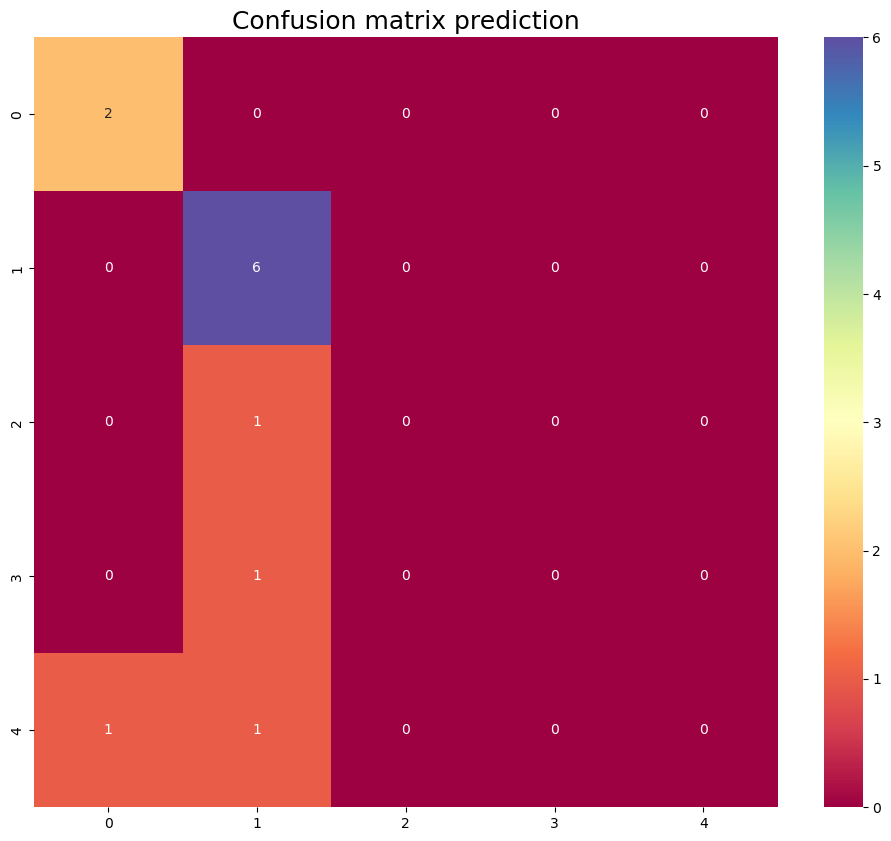

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Spectral')
ax.set_title('Confusion matrix prediction', fontsize=18)

print("Accuracy: ", accuracy_score(y_test, y_pred))

### Prediction with rotation applied

In [20]:

classifier_rot = RandomForestClassifier(max_depth=2, random_state=0)
classifier_rot.fit(X_train_pca_rot, y_train)

y_pred_rot = classifier_rot.predict(X_test_pca_rot)

[[0 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 2 0 0 0 0]]
Accuracy:  0.6666666666666666


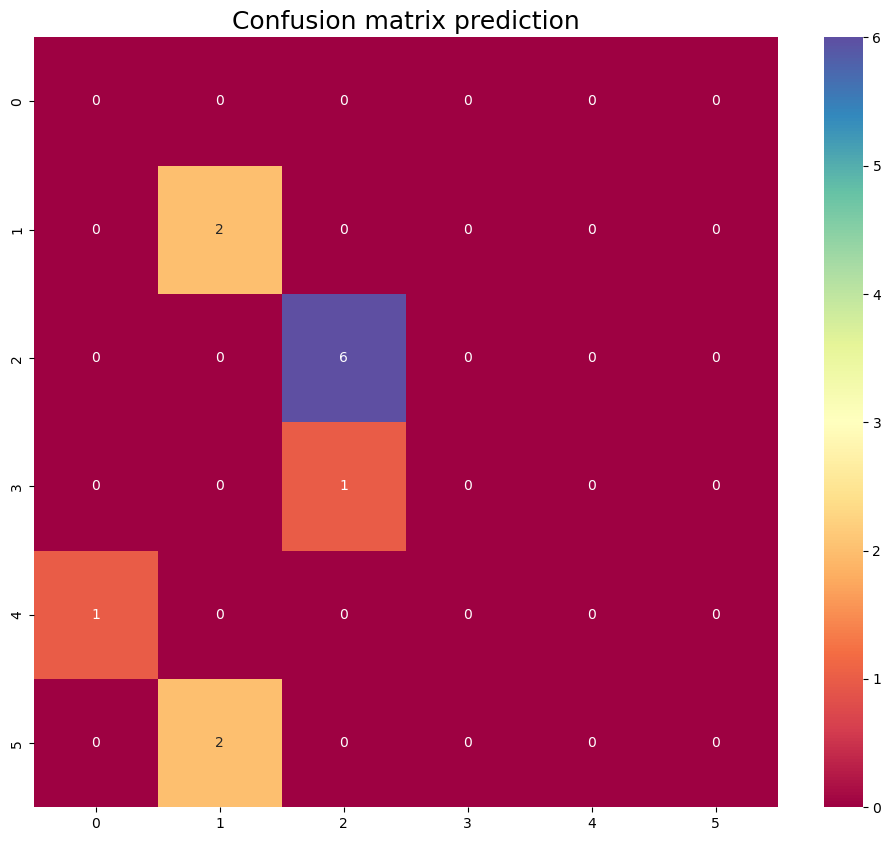

In [21]:
plt.figure(figsize=(12,10))
cm = confusion_matrix(y_test, y_pred_rot)
print(cm)

ax = sns.heatmap(cm, annot=True, cmap='Spectral')
ax.set_title('Confusion matrix prediction', fontsize=18)

print("Accuracy: ", accuracy_score(y_test, y_pred_rot))